## 목표
- 타이타닉 데이터를 학습해서 생존/사망 예측해보자
- 머신러닝의 전체 과정을 진행해보자

## 머신러닝 전체 과정 (7단계)
1) 문제 정의
2) 데이터 수집
3) 데이터 전처리
4) EDA(탐색적 데이터 분석)
5) 모델 선택 및 하이퍼 파라미터 조정
6) 모델 학습
7) 모델 평가

## 1. 문제 정의
- Kaggle에서 제공하는 titanic 데이터를 사용해 승객의 생존 여부를 예측
- 지도 학습 (train.csv - Survived)
- Survived 컬럼의 데이터값은 수치형이지만 0,1로 생존여부만 구분하고 있기때문에 우선순위는 없음
- 지도 학습(분류)

In [3]:
# 필요한 라이브러리 가져오기 (환경세팅)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 도구

- 실습1. 타이타닉 train데이터와 test데이터를 변수 train, test에 저장하기
 (단, PassengerId 컬럼을 인덱스로 설정해서 불러오기)

In [4]:
train = pd.read_csv('data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('data/test.csv', index_col = 'PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train["Survived"] = train['Survived'].astype("str")

In [6]:
# 크기 확인
print('훈련 데이터 셋 크기 : ', train.shape)
print('테스트 데이터 셋 크기 : ', test.shape)

훈련 데이터 셋 크기 :  (891, 11)
테스트 데이터 셋 크기 :  (418, 10)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


## 3. 데이터 전처리 및 데이터 탐색

In [8]:
# 훈련 데이터 셋 정보 확인
train.info()
# 결측치가 있는 컬럼 : Age, Cavin, Embarked
# 데이터 타입 : 숫자(정수, 실수), 문자열
# >> 모델은 문제 데이터가 숫자인 것만 인식 할 수 있다
# 문자 > 숫자 : 인코딩(원핫 인코딩, 레이블 인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


In [9]:
# 테스트용 데이터 셋 정보 확인하기
test.info()
# Survived 컬럼이 없다 -> 생존/사망 데이터가 없음
# 결측치가 있는 컬럼 : Age, Fare, Cabin
# 데이터 타입 : 숫자(정수, 실수), 문자열

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
# 컬럼 정보 정리
train.columns
# 'Survived' : 생존/사망 결과 값이 담긴 컬럼(0:사망, 1:생존)
# 'Pclass' : 승객의 등급(1:상위층, 2:중상위층, 3:하위층)
# 'Name'
# 'Sex'
# 'Age'
# 'SibSp' : 형제자매/배우자 수 (같이 탑승한)
# 'Parch' : 부모/자식의 수(같이 탑승한)
# 'Ticket' : 티켓의 번호
# 'Fare' : 요금
# 'Cabin' : 객실 번호
# 'Embarked' : 승선항 (S, C, Q)
# S = Southampton, C = Cherbourg, Q = Queenstown

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 결측치 채우기
- train : Age(v), Cabin, Embarked(v)
- test : Age(v), Fare(v), Cabin

In [11]:
# 결측치를 채우는 방법
# 1. 결측치가 있는 행 전체를 삭제하는 방법
# > 삭제하려는 데이터가 너무 많거나 모델링에 치명적이지 않은 데이터여야만 한다
# > 데이터가 많을 수록 과대적합을 피할수 있는데 삭제해버리면 학습할 수 있는 데이터가 줄어들어 버림
# 2. 결측치를 다른 값(대푯값)으로 대체하는 방법
# > 평균값, 최빈값, 중앙값 등..

In [12]:
# train - Embarked(승선항) 컬럼 결측치 채우기
train['Embarked'].value_counts()
# Embarked 컬럼의 결측치는 ?
train['Embarked'].isnull().sum()
# train['Embared'] 결측치가 있는 데이터 출력하기
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# 두 사람의 데이터를 열어서 확인해봤더니
# 이름, 나이를 제외하고는 데이터가 같다...
# 같은 승선항에서 탔을 것이라고 가정
# 사람이 가장 많이 탑승한 장소의 승선항 값으로 채워주기 - 최빈값
# fillna('값') : S
# 비어있는 데이터가 있다면 '값'으로 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')

In [14]:
train['Embarked'].isnull().sum()

0

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


- test : Fare컬럼의 결측치를 채우기

In [16]:
# test 데이터 Fare를 인덱싱한 후 결측치가 존재하는 행 출력
# isnull(), 불리언 인덱싱
test[test['Fare'].isnull()]
# 기술통계량 (describe)
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [17]:
# 혹시 Fare 컬럼과 연관성이 있는 컬럼이 있진 않을까?
# 상관관계 확인
test.corr(numeric_only = True) # 숫자로 된 컬럼 포함
# 상관 계수 : -1 ~ 1 범위로 표현됨
# -1, 1에 가까울수록 해당 컬럼과 상관이 높음, 관련성이 깊다
# 0에 가까울수록 해당 컬럼과 상관이 없음 의미
# Fare 컬럼과 Pclass 컬럼이 연관성이 가장 높구나!

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [18]:
# test['Fare'] 결측치 채워주기 - Pclass : 3
# test['Fare'] = test['Fare'].fillna(14.454200)
# test['Fare'].isnull().sum()

In [19]:
# train['Fare']를 확인해보자
# 실제 모델이 학습을하는 데이터는 train데이터이기 때문
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
# train에서 Fare와 상관관계가 높은 컬럼을 찾아보자
train.corr(numeric_only = True)

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [21]:
train.corr(numeric_only = True)['Fare'].abs().sort_values(ascending = False)
# 상관관계를 나타내는 표에서 Fare컬럼을 절대값으로 바꾸고 내림차순으로 확인해보자

# train, test 'Fare'컬럼은 Pclass와 연관성이 상대적으로 높음

Fare      1.000000
Pclass    0.549500
Parch     0.216225
SibSp     0.159651
Age       0.096067
Name: Fare, dtype: float64

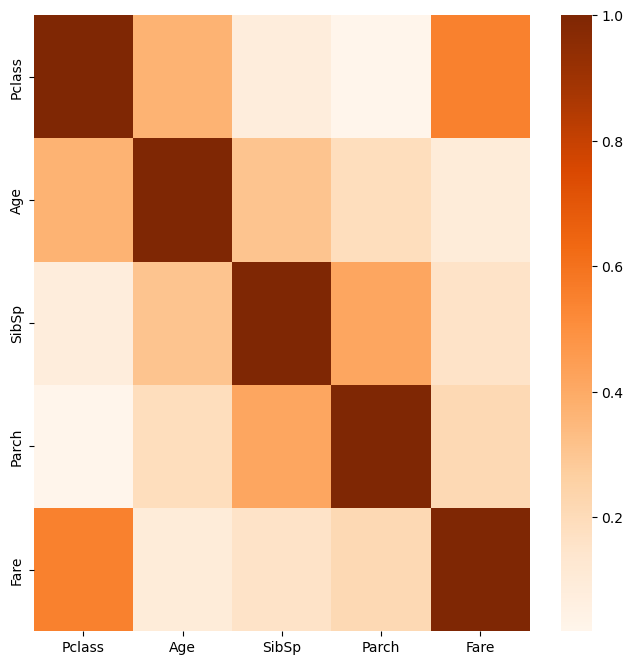

In [22]:
# 그래프를 통해서도 상관관계를 확인할 수 있다.
# 히트맵 표현
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(numeric_only = True).abs(), annot = False, cmap = 'Oranges')
# annot : 어노테이션
# cmap : color map
plt.show()

In [23]:
# train Pclass 컬럼 인덱싱
train['Pclass'].unique()
# 3 : 하위층, 2 : 중위층, 1 : 상위층

array([3, 1, 2], dtype=int64)

In [24]:
# 승객 등급을 기준으로 그룹화, 요금 컬럼 집계함수 연결(median())
train[['Pclass','Fare']].groupby('Pclass').median()
# Pclass를 그룹핑하여 Fare의 중앙값을 살펴본 코드
train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).median()
# Pclass, Sex 그룹핑하여 Fare의 중앙값을 확인해보기(실습)

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [25]:
# 결측치가 있는 행 출력해보기 : Fare
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [26]:
# fillna를 사용해서 결측치를 채워보자
# 3등급, 남자 - 7.925
test['Fare'] = test['Fare'].fillna(7.925)

In [27]:
test.info() # Fare 결측치 다 채워졌는지 확인하기

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train, test Age 채우기
    - 위에서 사용했던 Pclass, Sex컬럼을 그룹핑하여 Age의 집계를 확인하고 채워보자

In [28]:
# 중앙값을 쓸지, 평균값을 쓸지 판단하기 위해 Age 컬럼의 기술 통계량을 확인하기
# 대표성이 있는 값은 뭘까?

train['Age'].describe()
# mean()을 활용해서 확인해보자

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
# Pclass, Sex을 그룹핑하여 Age의 평균 출력해보기 - train
gb1 = train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [30]:
# gb1 - index 2개 - pclass, sex
# 멀티 인덱스(중복인덱스)
gb1.loc[(2,'male')]

Age    30.740707
Name: (2, male), dtype: float64

In [31]:
# 3등급의 여성 나이 평균 접근해보자 (실습)
gb1.loc[(3,'female')]

Age    21.75
Name: (3, female), dtype: float64

In [32]:
# train Age 결측치가 있는 행 정보 모두 출력
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [33]:
# 규칙에 맞게 Pclass와 Sex을 보면서 Age를 넣어보자
def fill_age(row):
    # print(row)
    # print('*'*15)
    # row 받아오는 행에 데이터에 대한 매개변수
    # row에 Age가 결측치라면 gb1값을 인덱싱 해오도록 만들어주자!
    # 만약에 나이가 결측치라면 gb1값을 인덱싱
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'],row['Sex'])]
    # 결측치가 아니라면 원래 나이 값을 사용
    else:
        return row['Age']

In [34]:
train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)
# axis = 0 (행방향, 열단위 처리)
# axis = 1 (열방향, 행단위 처리)
train['Age'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


C:\Users\ggg\AppData\Local\Temp\ipykernel_9808\3905307048.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)


In [35]:
# test Age 컬럼 결측치 해워보기
# gb1을 기준으로 동일하게 적용
# fill_age함수 test데이터에 적용
test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)

# apply, fill_age
# 테스트 데이터를 행단위로 쪼갠거를 매개변수로 보내줘서 안쪽 로직이 동작하고
# 결과값으로 Age를 채울수 있는 대표값을 하나 보내주는데
# 형변환을 해서 test'Age'컬럼에 그대로 넣어준다!

C:\Users\ggg\AppData\Local\Temp\ipykernel_9808\3623754524.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)


- train, test Cabin 채우기
    - Cabin 컬럼 데이터 확인, 의미 있는 데이터만 활용
    - 임의의 값으로 결측치를 채워볼 예정

In [36]:
# train 기준으로 데이터를 확인
train['Cabin'].unique()
train['Cabin'].info()

# A, B, C... 층으로 배에는 표기를 한다. 뒤에있는 숫자까지 사용하면 범주가 
# 너무 커질것 같으니 앞에있는 알파벳만 사용해보는건 어떨까?

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [37]:
# 우선 임의의 값으로 train, test Cavin 결측치를 채워보자
# 'M'
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [38]:
train['Cabin'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [39]:
# 첫 글자 알파벳 1개만 추출하기
# 문자열에 접근하려면 인덱싱, 슬라이싱
train['Deck'] = train['Cabin'].str[0]
# str : 데이터 내부 문자열에 접근하는 키워드
# 혹시 나중에 숫자가 달려있는 데이터가 필요할 수 도 있으니, Deck라는 새로운 컬럼을 
# 만들어서 알파벳 1개를 담아주자
test['Deck'] = test['Cabin'].str[0]

# column을 확인해보자
train.columns, test.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked', 'Deck'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'Deck'],
       dtype='object'))

In [40]:
# Cabin 컬럼 삭제하기 (train, test) - drop
# train데이터와 test데이터에서 Cabin컬럼을 삭제하자
# 데이터.drop(컬럼명, axis = , inplace = True)
# axis = 0이면, 행삭제
# axis = 1이면, 열삭제
# 여러개의 데이터를 삭제하고 싶으면 데이터.drop([열이름, 열이름...], axis = 1)
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)
# inplace : 삭제를 데이터에 반영하는 속성

In [41]:
# info() - 확인하기
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    i

- Deck 시각화

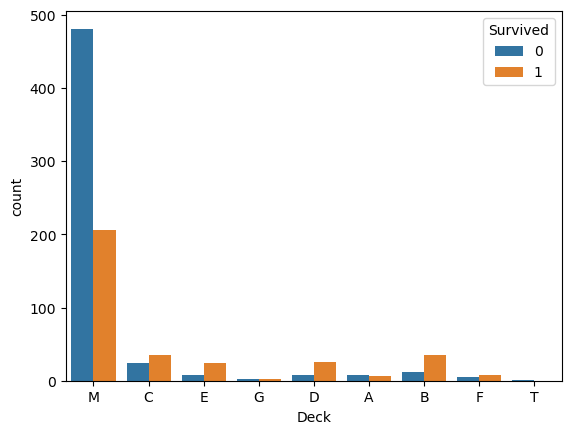

In [42]:
# sns 시각화 도구를 사용해서 범주형 데이터 Deck를 시각화 해보자
sns.countplot(data = train, x = 'Deck', hue = 'Survived')
plt.show()

In [43]:
# M층에서는 상대적으로 사망율이 높음
# 근데 M은 임의로 채워놓은 값이기에 다시 다른 컬럼을 살펴보면서 값을 다시 생각해보자 

- Pclass에 따른 생존/사망 시각화

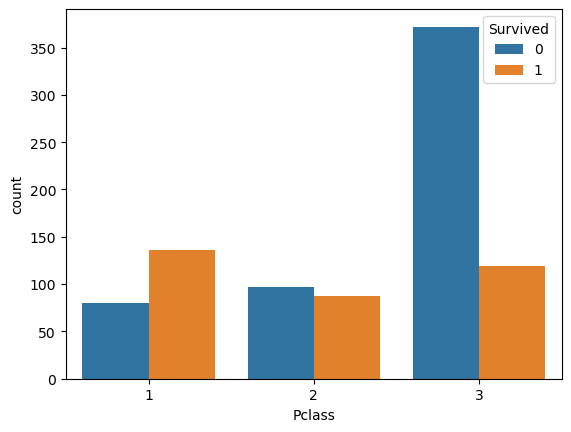

In [44]:
# Pclass가 사망에 얼마나 많은 영향을 받았는지 위데 데이터처럼 시각화를 진행해보자
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

In [45]:
# 1 : 생존율이 상대적으로 높음
# 2 : 사망율이 조금 높지만 생존률과 거의 비슷함
# 3 : 사망율이 월등히 높음

- Deck와 Pclass 시각화 연결
- x 축 : Deck, hue : Pclass

In [46]:
train['Pclass'] = train['Pclass'].astype('str')

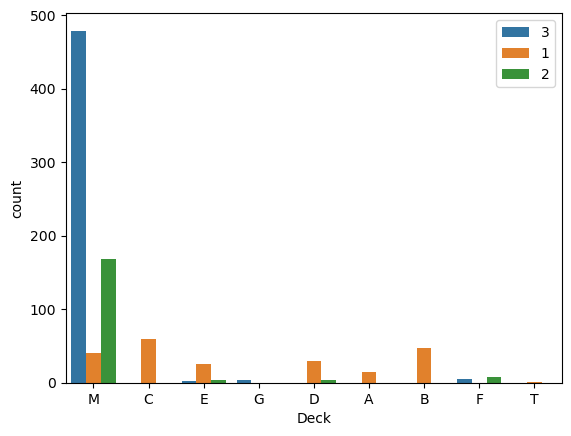

In [47]:
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.legend()
plt.show()

In [48]:
# M층에는 3등급의 사람이 많았기 때문에 상대적으로 사망률이 높았음을 파악
# M이라는 데이터는 더이상 신경쓰지 않아도 된다. 3등급이 많아서 사망률이 높았음을 파익

- Sex, Embared(범주형 데이터)에 따른 생존/사망 시각화해보기

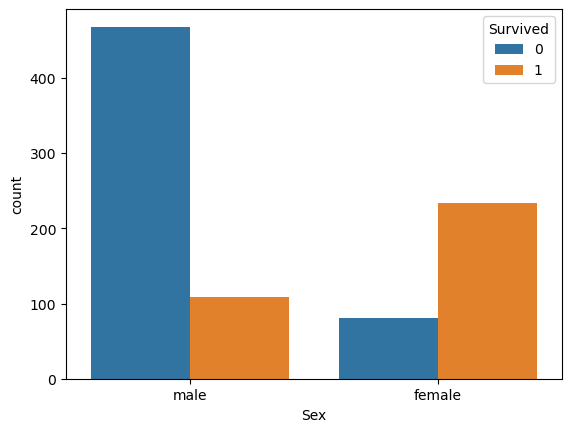

In [49]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.show()

In [50]:
# 남성 사망율이 높고, 여성 생존율이 상대적으로 높음!

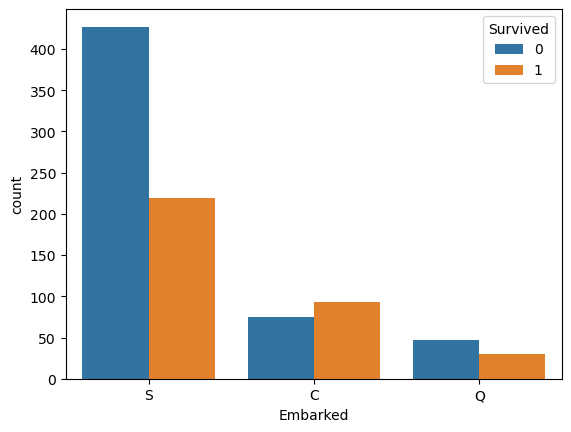

In [51]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

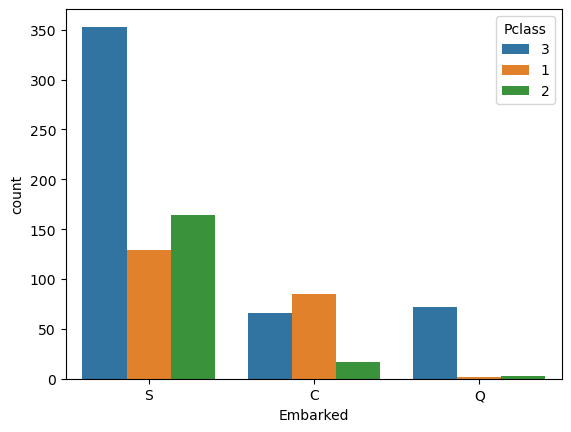

In [52]:
# S 승선항에서 Pclass가 3인사람이 많이 탄건 아닌가?
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')
plt.show()

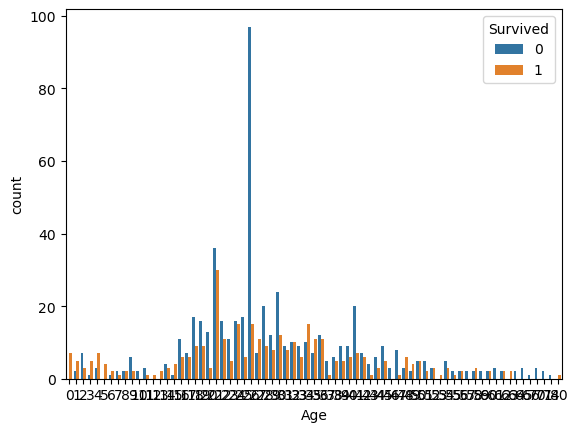

In [53]:
sns.countplot(data = train, x = 'Age', hue = 'Survived')
plt.show()

In [54]:
# 나이데이터를 countplot으로 시각화 했더니, 해석하기가 힘듬
# violinplot을 활용해보자 : 수치형 데이터의 분포를 확인할 때 사용하는 그래프

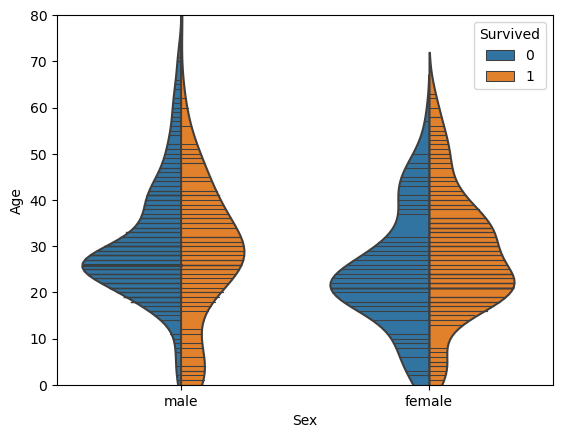

In [55]:
# 바이올린 형태로 데이터의 분포와 밀도를 보기 좋게 곡선으로 표현한 그래프
# 데이터가 많이 존재하는 부분은 두껍게
# 데이터가 적게 존재하는 부분은 얇게

# 성별과 나이에 따른 생존/사망자 수를 확인해보자
sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Age',
    hue = 'Survived',
    split = True,
    inner = 'stick'
)
plt.ylim(0,80)
plt.show()

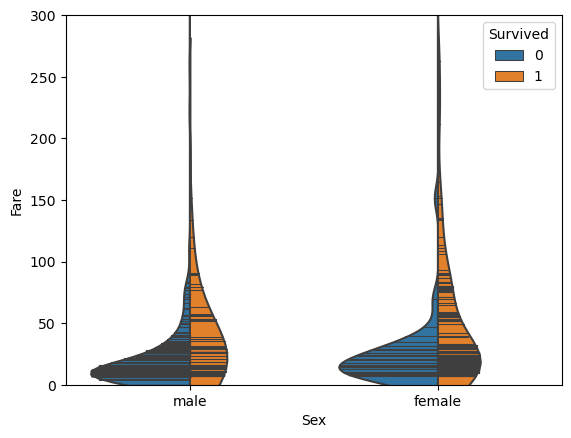

In [56]:
# Sex와 Fare에 따른 Survived를 시각화 해보자
sns.violinplot(
    data = train, 
    x = 'Sex',
    y = 'Fare',
    hue = 'Survived',
    inner = 'stick',
    split = True
)
plt.ylim(0,300)
plt.show()

In [57]:
# 요금이 저렴한 사람은 사망률이 높다, 요금이 높은 사람은 생존율이 높다

- 특성공학 : 새로운 컬럼을 생성(transform)
    - Parch, SibSp를 더해서 가족의 숫자라는 새로운 컬으로 생성해보자
    - train, test 동일하게 적용하자

In [58]:
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1 # +1 : 본인을 포함
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [59]:
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1 # +1 : 본인을 포함
test['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int64

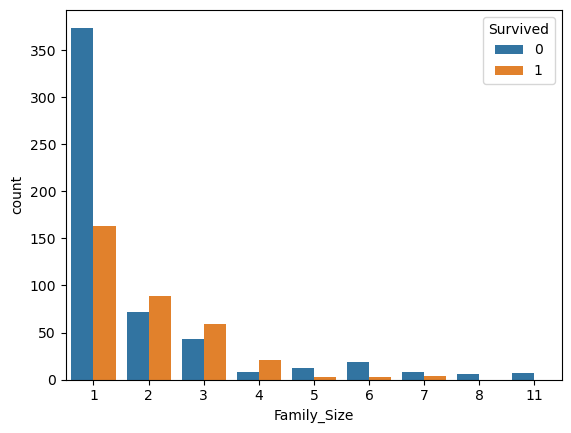

In [60]:
# 시각화
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')
plt.show()

In [61]:
# 1명 일때는 사망율이 높음 - alone
# 2명 - 4명일때는 생존율이 높음 - small
# 5명 이상은 사망률이 높음 - large
# 수치형 데이터를 범주형 데이터로 만들어서 갯수를 줄여보자 - binning
# binning작업을 통해서 사소한 관찰의 오류를 줄여주자!

- 가족의 사이즈가 1이면 Alone, 2-4명이면 Small, 5명이상이면 Large로 바꿔주자
- train, test 둘다 변경

In [62]:
bins = [0, 1, 4, 11]# 숫자 범위 설정
# (0, 1] : 1 ~ 1, (1, 4] : 2 ~ 4, (4,11] : 5 ~ 11
labels = ['Alone', 'Small', 'Large']
# size는 뭔가 수치형 데이터를 포함하고 있는 것 같으니
# group이라는 새로운 컬럼을 생성해보자!
train['Family_group'] = pd.cut(train['Family_Size'], bins = bins, labels = labels)
test['Family_group'] = pd.cut(test['Family_Size'], bins = bins, labels = labels)

C:\Users\ggg\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ggg\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


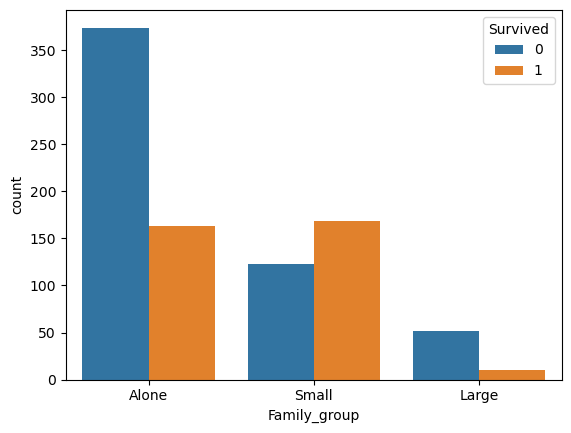

In [63]:
# Family_group 컬럼에 따른 Survived(생존자/사망자)를 시각화 - countplot
sns.countplot(
    data = train, 
    x = 'Family_group',
    hue = 'Survived',# count가 되는 컬럼
)
plt.show()

1) 불필요한 컬럼 삭제
   - drop 버리기
   - 전처리 대상에서 제외된 컬럼과 특성공학 후 불필요해진 컬럼

In [64]:
train.info() 
# train 데이터에서 전처리를 하지 않았던 컬럼
# 전처리후 필요가 없어진 컬럼

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    object  
 1   Pclass        891 non-null    object  
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family_Size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(7)
memory usage: 91.5+ KB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Embarked      418 non-null    object  
 9   Deck          418 non-null    object  
 10  Family_Size   418 non-null    int64   
 11  Family_group  418 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 39.7+ KB


In [66]:
# drop, axis = 1, inplace = True
train.drop(['Name','Ticket','SibSp','Parch','Family_Size'], axis = 1, inplace = True)
test.drop(['Name','Ticket','SibSp','Parch','Family_Size'], axis = 1, inplace = True)

In [67]:
train.columns, test.columns

(Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck',
        'Family_group'],
       dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_group'], dtype='object'))

- 전처리 과정은 마무리가 되었다!
- train에는 정답데이터와 문제데이터가 하나의 프레임으로 들어있는 상태
  (X_train, y_train으로 분리)
- test는 원래 정답을 제공하지 않음 (X_test)

In [68]:
X_train = train.drop('Survived', axis = 1)
# train.iloc[:,1:], train[:,'Pclass':] - 2차원
y_train = train['Survived'] # 훈련용 정답데이터

X_test = test

print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 7) (891,)
(418, 7)


In [69]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_group'], dtype='object')

## 다시 전처리 단계로 넘어가서
- 범주형 데이터는 학습용으로 사용할 수 없으니 수치형으로 바꿔주자
- Encoding
  1) 레이블 인코딩(label Encoding) : 값에 우선순위를 주고싶을때 사용하는 방법
  2) 원-핫 인코딩(one-hot Encoding) : 값에 우선순위를 주고싶지 않고 구분하는 용도로만 사용하는 방법
- 우리는 구분용도를 위해 one-hot Encoding으로 진행해보자

In [70]:
X_train.shape, X_test.shape

((891, 7), (418, 7))

In [71]:
X_train["Pclass"] = X_train["Pclass"].astype(np.int64)

In [72]:
X_train_one_hot = pd.get_dummies(X_train)
X_test_one_hot = pd.get_dummies(X_test)

In [73]:
X_train_one_hot.shape

(891, 20)

In [74]:
X_test_one_hot.shape

(418, 19)

In [75]:
set(X_train_one_hot) - set(X_test_one_hot)

{'Deck_T'}

```python
# int와 float를 제외하고 다른 데이터를 선택할 수 있는 방법
# 카테고리 필터링을 진행해보자
cat_filter = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
# X_train에서 컬럼중에 데이터타입이 int가 아닌 컬럼들을 변수에 담아주는 코드
cat_filter

cat_choice = X_train.columns[cat_filter]
cat_choice
# X_train[cat_choice].head(2)
# X_train에서 cat_choice에 해당하는 컬럼들을 원핫인코딩을 진행하자!
```

In [76]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [77]:
X_test_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

```python
# 해당 cat_choice 컬럼을 인코딩해서 기존 train,test데이터와 병합
# 1) 원핫인코딩(cat_choice) pd.get_dummies(데이터)
X_train_c_oh = pd.get_dummies(X_train[cat_choice])
X_test_c_oh = pd.get_dummies(X_test[cat_choice])
# 2) 병합 concat , X_train과 X_train_c_oh를 병합 concat(병합할 두개의 데이터, axis = 1)
X_train = pd.concat([X_train, X_train_c_oh], axis = 1)
X_test = pd.concat([X_test, X_test_c_oh], axis = 1)
# 3) 기존 컬럼(범주형데이터가 들어가있는 컬럼 : cat_choice)은 삭제한다 - drop axis = ?
X_train = X_train.drop(cat_choice, axis = 1)
X_test = X_test.drop(cat_choice, axis = 1)
```

In [78]:
# 문제의 개수가 다르니 train만 가지고 있는 특성은 뭔지 확인해보자!
X_train_one_hot.columns, X_test_one_hot.columns

(Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
        'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
        'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_group_Alone',
        'Family_group_Small', 'Family_group_Large'],
       dtype='object'),
 Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
        'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
        'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
        'Family_group_Small', 'Family_group_Large'],
       dtype='object'))

- 특성 개수 맞추기
    - 부족한 컬럼명을 확인해서 추가하기
      1) 컬럼명을 확인해서 다른점 찾기
      2) set() 집합 자료구조 활용해서 찾아보기

In [79]:
set(X_train_one_hot.columns) - set(X_test_one_hot.columns) # 차집합

{'Deck_T'}

In [80]:
# X_test에 Deck_T라는 컬럼을 새롭게 만들어주자
# X_test에는 T값을 가진 행이 없으므로 다 ~ 0으로 초기화를 시켜주자
X_test_one_hot['Deck_T'] = 0
X_test_one_hot['Deck_T']

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Deck_T, Length: 418, dtype: int64

In [81]:
X_test_one_hot.info()
X_train_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    bool   
 4   Sex_male            418 non-null    bool   
 5   Embarked_C          418 non-null    bool   
 6   Embarked_Q          418 non-null    bool   
 7   Embarked_S          418 non-null    bool   
 8   Deck_A              418 non-null    bool   
 9   Deck_B              418 non-null    bool   
 10  Deck_C              418 non-null    bool   
 11  Deck_D              418 non-null    bool   
 12  Deck_E              418 non-null    bool   
 13  Deck_F              418 non-null    bool   
 14  Deck_G              418 non-null    bool   
 15  Deck_M              418 non-null    bool   
 16  Family_gro

In [82]:
# X_train의 컬럼의 순서, X_test의 컬럼의 순서가 다름
# X_train 컬럼 순서대로 자동 인덱싱
X_test_one_hot = X_test_one_hot[X_train_one_hot.columns]

In [83]:
print(X_train_one_hot.shape, y_train.shape)
print(X_test_one_hot.shape)

(891, 20) (891,)
(418, 20)


In [84]:
# sklearn에서 제공되는 모델들은 전부 입력값을 숫자로 입력받음!
y_train = y_train.astype(np.int64)

---

### 모델 선택 및 학습

In [85]:
# 필요한 라이브러리 가져오기
from sklearn.tree import DecisionTreeClassifier
# 교차검증
from sklearn.model_selection import cross_val_score # 교차검증

In [86]:
# 모델 객체 생성
# 하이퍼 파라미터 설정 x
tree_model = DecisionTreeClassifier()

In [87]:
# 어느정도의 성능을 내는지 교차검증 5번을 통해 확인 (일반화)
cv_result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5)
cv_result.mean()
# 평균적으로 78%의 성능을 내고 있군
# test데이터에서는 조금 더 정확도 떨어질 수도 있겠다...

0.7834410896993284

In [88]:
# 학습 - 학습용
tree_model.fit(X_train_one_hot, y_train)
# 예측 - 테스트용
pre = tree_model.predict(X_test_one_hot)
# Kaggle 제출 - submission.csv 불러오기
# submission , Survived 컬럼이있는데 pre값 대입시켜주기
# csv로 저장 (index = False) - tree_model_01.csv 
result = pd.read_csv('data/gender_submission.csv')
result['Survived'] = pre
result.to_csv('data/tree_model_01.csv', index = False)

- tree model의 하이퍼 파라미터를 조정 (max_depth : 최대 깊이)

In [89]:
# 교차검증을 하면서 하이퍼 파라미터 조정 확인해보기! (1 ~ 9)
for md in range(1,10) :
    tree_model = DecisionTreeClassifier(max_depth = md)
    result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5) # 5개의 정확도
    print(f'depth:{md}', result.mean())
    

depth:1 0.7867365513778168
depth:2 0.773316176009039
depth:3 0.8024606113866047
depth:4 0.807005209967987
depth:5 0.8136965664427844
depth:6 0.8170736300295023
depth:7 0.8159437574540206
depth:8 0.8181909484652564
depth:9 0.8047266336074319


In [90]:
# tree_model2를 객체생성
# 하이퍼 파라미터 max_depth를 위에서 가장 높은 정확도를 내고있는 값으로 설정 - 6
tree_model2 = DecisionTreeClassifier(max_depth = 6)

In [91]:
# 학습
tree_model2.fit(X_train_one_hot, y_train)
# 예측
pre2 = tree_model2.predict(X_test_one_hot)
# 모델 답안지 초기화 - tree_model_02.csv
result2 = pd.read_csv('data/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('data/tree_model_03.csv', index = False)
# 정확도 캡쳐해서 올려보기

In [92]:
# tree_model2가 어떤 특성을 중요하게 생각하는지 특성 중요도 그래프
fi = tree_model2.feature_importances_
fi

array([0.12587444, 0.11648766, 0.0840553 , 0.50258411, 0.        ,
       0.00301714, 0.        , 0.0083284 , 0.        , 0.        ,
       0.        , 0.        , 0.01510388, 0.        , 0.        ,
       0.05694591, 0.        , 0.        , 0.02776957, 0.05983358])

In [93]:
fi_s = pd.Series(fi, index = X_train_one_hot.columns)
fi_s

Pclass                0.125874
Age                   0.116488
Fare                  0.084055
Sex_female            0.502584
Sex_male              0.000000
Embarked_C            0.003017
Embarked_Q            0.000000
Embarked_S            0.008328
Deck_A                0.000000
Deck_B                0.000000
Deck_C                0.000000
Deck_D                0.000000
Deck_E                0.015104
Deck_F                0.000000
Deck_G                0.000000
Deck_M                0.056946
Deck_T                0.000000
Family_group_Alone    0.000000
Family_group_Small    0.027770
Family_group_Large    0.059834
dtype: float64

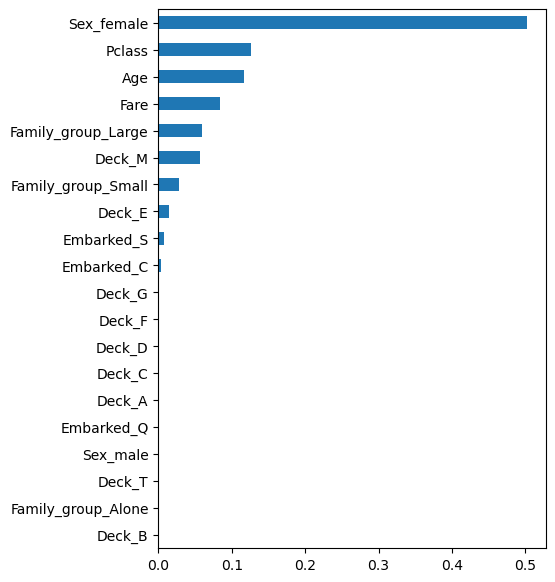

In [94]:
plt.figure(figsize = (5,7))
fi_s.sort_values(ascending = True).plot.barh()
plt.show()

- KNN Model을 사용해서 정확도를 확인해보자

In [95]:
# KNN 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# KNN 모델을 생성
knn_model = KNeighborsClassifier()
# KNN 모델 하이퍼 파라미터는 따로 조정하지 않겠습니다.

# 교차검증 5번 - 정확도 평균 print
result2 = cross_val_score(knn_model, X_train_one_hot, y_train, cv= 5)
print(result2)
# 학습
knn_model.fit(X_train_one_hot, y_train)
# 예측결과 - pre
pre = knn_model.predict(X_test_one_hot)
# summision.csv - 답안지 - data폴더에 파일 빼주는 작업
sm = pd.read_csv('data/gender_submission.csv')
sm['Survived'] = pre
sm.to_csv('data/knn_model_01.csv', index= False)
# Kaggle 제출

[0.67039106 0.66853933 0.70224719 0.71348315 0.71348315]


## 결과
- KNN : 64%
- DT : 72.24%
- 결과 해석 : 성능 개선
    - 데이터의 양을 늘리기
    - 전처리 방식 수정
    - 모델의 하이퍼 파라미터 조절(5% 내외로 성능이 올라감)
    - 더 성능이 좋은 모델을 선택

In [96]:
# KNN 모델은 알고리즘이 간단한 대신에 성능이 좋지 못하다
# train에서는 70% 정도의 성능 실제로 평가를 진행했을 때 64%의 성능
# 보이는 것으로 보아 과소 적합의 현상이 일어나고있다.

# DT train은 어느정도 높은 성을 내고 있으나, 평가를 진행했을 때 갑자기
# 15~18%정도 떨어지는 정확도를 확인할 수 있었다. 이를 통해 DT같은 경우
# 과대적합이 일어나고 있다.

### 데이터 스케일링
- 데이터의 범위를 조정

- feature들의 데이터 분포, 범위를 동일하게 조정하는 작업
- 거리, 수치 기반의 학습을 진행하는 모델에게 적용

- 장점 : 범위를 일정하게 맞추어 모델이 데이터를 더 쉽게 처리하고, 모델 성능 향상으로 이어질 수 있다
- 단점 : 원래 데이터가 가지고 있는 값이 변경되기 때문에 왜곡될 수 있다.
(원래 범위를 유지하는게 더 좋다고 판단이 된다면 스케일링을 스케일링을 하지않는게 왜곡을 방지 할 수 있음)

1) StandardScaler
   - 분산의 정도를 1로 평균은 0으로 맞춰주는 도구
   - 정규분포인 경우 효율적임
2) MinMaxScaler
   - 일정한 범위의 값 (0 ~ 1)으로 조정하는 도구
   - 비정규분포인 경우 효율적

``` Python
# 라이브러리 가져오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler

st_sc = StandardScaler()
mm_sc = MinMaxScaler()

# st_sc, mm_sc가 데이터에 대해 이해할 수 있도록 학습 - fit
st_sc.fit(X_train)
mm_sc.fit(X_train)

# 스케일러가 데이터에 대한 이해가 완료되었으면, 변환하는 작업 - transform
st_X_train = st_sc.transform(X_train)
mm_X_train = mm_sc.transform(X_train) # fare 0 ~ 1

# train데이터가 범위 조정이 되었으면, test 데이터도 같이 범위 조정이 되어져야한다!
st_X_test = st_sc.transform(X_test)
mm_X_test = mm_sc.transform(X_test)

# 스케일링은 거리계산, 확률계산을 하는 모델에 적용할 수있는 개념으로써 위에 만들어 놨던
# knn모델을 사용해서 교차검증을 진행해보자!

st_result = cross_val_score(knn_model, st_X_train, y_train, cv = 5)
mm_result = cross_val_score(knn_model, mm_X_train, y_train, cv = 5)

print(st_result, st_result.mean())
print(mm_result, mm_result.mean())
```

## 앙상블
- 여러 모델을 결합하는 방식으로 활용하며, 성능을 올리는 기법
  1) 보팅(Voting)
     - 여러 개의 **다른 종류의 모델**이 예측한 결과를 *투표* 혹은 *평균*을 통해 최종 결정을 하는 방식
       1. 하드보팅(Hard-Voting) : 투표(다수결)
       2. 소프트보팅(Soft-Voting) : 확률값을 통한 결정
  2) 배깅(Bagging - Boostrap Aggregation)
     - 여러 개의 **같은 종류의 모델**이 예측한 결과를 *투표* 혹은 *평균*을 통해 최종 결정을 하는 방식
     - 대표 모델 : RandomForest (Decision Tree를 여러 개 사용하는 모델)
  3) 부스팅(Boosting)
     - 여러 모델을 순차적으로 학습을 시켜 이전 모델의 오류를 보정한다.
     - AdaBoost, GradientBoost
     - 후속 모델이 이전 모델의 잘못된 예측을 수정하면서 성능이 점점 좋아지는 현상

In [97]:
# 보팅 도구 불러오기
from sklearn.ensemble import VotingClassifier
# 확률값을 계산하는 모델들도 같이 불러오기
from sklearn.linear_model import LogisticRegression # 선영 분류 모델
from sklearn.svm import SVC # 서포트 벡터 머신

In [98]:
# 로지스틱 회귀 (분류만 가능한 모델)
# 분류 알고리즘 중 하나로, 주어진 데이터가 특정 분류에 속할 확류을 추정
# 결과값이 0~2 사이의 값, 0.5를 기준으로 특정 클래스에 속할 확률을 나타낸다.
# max_iter 알고리즘이 수렴할 때까지 반복하는 최대 횟수를 지정 (ㅎ학습의 빈도수를 지정)

# 서포트 벡터 머신
# 결정 경계선(또는 면)을 만들어서 새로운 데이터의 포인트가 어느 클래스에 속하는 지 예측하는 모델
# 확률값을 제공하지 않음
# probability true로 바꿔주면 확률값을 확인할 수 있다!

log_clf = LogisticRegression(max_iter = 10000)
svm_clf = SVC(probability=True)#확률을 확인해보자


In [99]:
# 하드 보팅 분류기
hard_voting_clf = VotingClassifier(
    # 모델
    estimators = [('lr', log_clf),('svc', svm_clf)],
    # 보팅 방식 지정(hard)
    voting = 'hard'
)
# 학습
hard_voting_clf.fit(X_train_one_hot, y_train)
# 검증
cross_val_score(hard_voting_clf, X_train_one_hot, y_train, cv = 5).mean()

0.7060071558596447

In [100]:
# 소프트 보팅 분류기
soft_voting_clf = VotingClassifier(
    # 모델
    estimators = [('lr', log_clf),('svc', svm_clf)],
    # 보팅 방식 지정(soft)
    voting = 'soft'
)
# 학습
# soft_voting_clf.fit(X_train_one_hot, y_train)
# 검증
cross_val_score(soft_voting_clf, X_train_one_hot, y_train, cv = 5).mean()

# => 하드 보팅보다 소프트 보팅 결과값이 좀 더 디테일하게 잘 맞춤

0.7778796058000126

In [101]:
# Bagging : 같은 종류의 여러 모델이 예측한 결과를 투표(평균)을 통해 최종 결정하는 방식
# 대표 모델 : RandomForest

from sklearn.ensemble import RandomForestClassifier

In [102]:
# 검증
cross_val_score(RandomForestClassifier(), X_train_one_hot, y_train, cv = 5).mean()

0.8114493754315486

#### 복습
##### 단계
1. 문제정의
2. 데이터 수집
3. 전처리
   - 결측치 제거 , 대체
   - 이상치 제거 , 대체
   - 변수처리
   - train/test 분리
4. EDA(탐색적 데이터 분석)
   - 시각화
5. 모델 선택(교차검증) , 하이퍼 파라미터 조정(3 ~ 5% ↑)
6. 학습
7. 평가(metrics)
---
##### 성능 판단
  - 일반화 : train set 중상 , test set 중상
  - 과대적합 : train set 상 , test set 중하 ~ 중
  - 과소적합 : train set 하 , test set 하

#### GridSearchCV 적용해서 최적의 하이퍼 파라미터 찾기

In [103]:
# 도구 불러오기
from sklearn.model_selection import GridSearchCV

In [104]:
# 1. 하이퍼 파라미터(초 매개변수) 경우의 수 설정
params = { # 딕셔너리로 만들기 - 하이퍼파라미터 경우의 수
    'n_estimators' : [50, 100, 200],   # 트리 개수 설정
    'max_depth' : [3, 5, 7],           # 트리 최대 깊이 제한(사전 가재 치기)
    'min_samples_split' : [3, 5, 7]    # 노드를 분할하기 위한 최소 샘플 수 지정
}

# 2. 해당 모델 초기화(생성)
rf_clf = RandomForestClassifier(random_state = 2024)   # 결과의 재현성을 위해서 난수(랜덤수) 고정시키기

# 3. gridsearch 옵션 설정
grid = GridSearchCV(
    rf_clf,
    params,       # 하이퍼파라미터 경우의 수
    cv = 5,       # 내부에서 교차검증을 통해 성능 비교 => k겹 설정 해줌
    n_jobs = -1   # 사용 가능한 모든 CPU 코어를 사용하여 병렬 처리로 수행
)

# 4. 실행 => 찾아라!
grid.fit(X_train_one_hot, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2024),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [105]:
# 최적의 하이퍼파라미터 조합 확인
grid.best_params_

{'max_depth': 7, 'min_samples_split': 7, 'n_estimators': 50}

In [106]:
# 최적의 하이퍼 파라미터로 예측을 수행한 성능값(accuracy, 정확도-비율)
grid.best_score_

0.8260561170045821

In [107]:
# 최적의 하이퍼 파라미터로 세팅된 모델
best_rf_clf = grid.best_estimator_

In [108]:
best_rf_clf.predict(X_test_one_hot)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
# 검증
cross_val_score(best_rf_clf, X_train_one_hot, y_train, cv = 5).mean()

0.8260561170045821